In [1]:
from numpy.random import choice as np_choice
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd 
from IPython.display import display
from scipy.sparse import csr_matrix
import scipy.sparse as sp
import gensim
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
import warnings
import math
import time
import json
import random
import statistics
from numpy import inf
import matplotlib.pyplot as plt
import networkx as nx
from ge.classify import read_node_label, Classifier
from ge import Node2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
warnings.filterwarnings(action = 'ignore')  
from scipy.cluster.hierarchy import dendrogram, linkage
import pefile
from tkinter import *
from tkinter.filedialog import askopenfilename


In [17]:
class document_processing(object):
    
    
    def __init__(self,dataset):
        self.data=pd.read_csv(dataset)
        self.corpus=None
        
      
    def readDataset(self):
        
       
        self.corpus=self.data['ImportedSymbols']


In [18]:
class TFIDF(document_processing):
    
    def __init__(self,dataset):
        super().__init__(dataset)
        super().readDataset()
        self.vectorizer = None
        self.vocab=None
        self.feature_names=None
        self.df_list=[]
        self.tfidf_vector=None
        self.vectorizing_data()
        
    def vectorizing_data(self):
        
        self.vectorizer = TfidfVectorizer(token_pattern='[^ ()]+',use_idf=False)
        self.tfidf_vector = self.vectorizer.fit_transform(self.corpus)
        vectorizer2 = TfidfVectorizer(min_df=0.0005,token_pattern='[^ ()]+')
        Y=vectorizer2.fit_transform(self.corpus)
        self.vocab=vectorizer2.get_feature_names()
        
        self.feature_names=self.vectorizer.get_feature_names()
        print(len(self.feature_names))
        
    def display_tfidf(self):
        for i in range(5):
            first_document_vector=self.tfidf_vector[i]
            df = pd.DataFrame(first_document_vector.T.todense(), index=self.feature_names, columns=["tfidf"]) 
            df.sort_values(by=["tfidf"],ascending=False)
            df = df[(df.T != 0).any()]
            self.df_list.append(df)
        for i in self.df_list:


            display(i)

        
        
        
        

In [19]:
class Word2VEC(document_processing):
    
    def __init__(self,dataset):
        super().__init__(dataset)
        super().readDataset()
        self.data=[]
        self.vector=None
        self.vocabulary=None
        self.word2vec_vector=None
        self.word2vec_processing()
        
        
    def word2vec_processing(self):
        for j in range (len(self.corpus)):
            temp=[]
            new_test=self.corpus[j].split()
            for i in range(len(new_test)):
                temp.append(new_test[i].lower())
                   # print(temp)
            self.data.append(temp)    
        
                
        self.vector= TfidfVectorizer(min_df=0.0005,token_pattern='[^ ()]+')
        Y=self.vector.fit_transform(self.corpus)
        self.vocabulary=self.vector.get_feature_names()
        self.word2vec_vector = Word2Vec(self.data,vector_size=300, min_count = 1, 
                               window = 1)
        
    def displayAll(self):
        vocabulary = list(model1.wv.key_to_index)
        for i in vocabulary:
            print("The similiarity for " + i )
            print(model1.wv.most_similar(i))

    

            
            
            



    

        
    
    


        
    
    






In [20]:
class Model:

   
    def __init__(self,tfidf_instance=None,word2vec_instance=None):
        self.our_tfidf_matrix =[]
        self.our_word2vec_matrix =[]
        self.tfidf_instance=tfidf_instance
        self.word2vec_instance=word2vec_instance
        self.tfidf_map={}
        
    
    
    def create_tfidf_Matrix(self):
        for word in self.tfidf_instance.vocab:
            temp_list=[]
            for i in range(len(self.tfidf_instance.vocab)):
                temp=word+" "+self.tfidf_instance.vocab[i]
              

                if(word==self.tfidf_instance.vocab[i]):
                    temp_list.append(0)


                elif temp in self.tfidf_instance.vectorizer.vocabulary_.keys():

                    c = self.tfidf_instance.vectorizer.vocabulary_[temp]

                    y=self.tfidf_instance.tfidf_vector[:,c].todense()
                    temp_list.append(y.sum()/len(y))

                else:
                    temp_list.append(0)


            self.our_tfidf_matrix.append(temp_list)
        #print(self.our_tfidf_matrix)
            
    def create_word2vec_Matrix(self):
        for word in self.word2vec_instance.vocabulary:
            temp_list=[]
            for i in range(len(self.word2vec_instance.vocabulary)):
                
                frequency= self.word2vec_instance.word2vec_vector.wv.similarity(word, self.word2vec_instance.vocabulary[i])
                if(word==self.word2vec_instance.vocabulary[i]):
            
                    temp_list.append(0)
                elif(frequency<=0):
                    temp_list.append(0)
          
                else:
                    temp_list.append(frequency.astype(np.float64))
            self.our_word2vec_matrix.append(temp_list)
        #print(self.our_word2vec_matrix)
#
            
    def write_Matrix(self,matrix,text_file):
            
        with open(text_file, 'w') as f:
            f.write(json.dumps(matrix))
                
    def read_tfidf_Matrix(self,text_file):
        with open(text_file, 'r') as f:
            self.our_tfidf_matrix = json.loads(f.read())
    def read_word2vec_Matrix(self,text_file):
         with open(text_file, 'r') as f:
            self.our_word2vec_matrix = json.loads(f.read())
    def mapping(self):
        
        for i in range(len(self.tfidf_instance.vocab)):
            for j in range(len(self.tfidf_instance.vocab)):
                self.tfidf_map[(self.tfidf_instance.vocab[i],self.tfidf_instance.vocab[j])]=self.our_tfidf_matrix[i][j]
                
                
    def mapping2(self):
        
        for i in range(len(self.our_tfidf_matrix)):
            for j in range(len(self.our_tfidf_matrix)):
                self.tfidf_map[(self.tfidf_instance.vocab[i],self.tfidf_instance.vocab[j])]=self.our_tfidf_matrix[i][j]
                
                
        
                
        
   
                


            
            
            

In [21]:



# tfidf=TFIDF("gware.csv")
# model=Model(tfidf_instance=tfidf)
# model.create_tfidf_Matrix()
# model.write_Matrix(model.our_tfidf_matrix,"final_tfidf_goodware_max.txt")
# w2v=Word2VEC("gware.csv")
# model=Model(word2vec_instance=w2v)
# model.create_word2vec_Matrix()
# model.write_Matrix(model.our_word2vec_matrix,"final_word2vec_goodware.txt")
tfidf=TFIDF("goodware.csv")
model=Model(tfidf_instance=tfidf)

model.read_tfidf_Matrix('final_tfidf_goodware.txt')





44822


In [22]:
# w2v2=Word2VEC("braz-malware.csv")
# model2=Model(word2vec_instance=w2v2)
# # model2.create_word2vec_Matrix()
# model2.write_Matrix(model2.our_word2vec_matrix,"final_word2vec_malware.txt")
# tfidf2=TFIDF("brazilian-malware.csv")
# model2=Model(tfidf_instance=tfidf2)
# model2.read_tfidf_Matrix('final_tfidf_malware.txt')

# # model2.create_tfidf_Matrix()




tfidf2=TFIDF("braz-malware.csv")
model2=Model(tfidf_instance=tfidf2)
model2.read_tfidf_Matrix('final_tfidf_malware.txt')
# model2.create_tfidf_Matrix()
# model2.write_Matrix(model2.our_tfidf_matrix,"final_tfidf_malware_max.txt")



40161


In [ ]:
print(len(tfidf2.vocab))
print(len(model2.our_tfidf_matrix))

In [23]:
model.mapping()
model2.mapping()

In [ ]:
a = np.array(model.our_tfidf_matrix)
res = np.sum(a, axis=1)
start_points=[]
median=statistics.median(res)
for i in range(len(res)):
    if(res[i]>=median):
        start_points.append(i)


In [ ]:
b = np.array(model2.our_tfidf_matrix)
res2 = np.sum(b, axis=1)
start_points2=[]
median2=statistics.median(res2)
for i in range(len(res2)):
    if(res2[i]>=median2):
        start_points2.append(i)
                

In [ ]:
class AntColony(object):

    def __init__(self, distances, n_ants, n_best, n_iterations, decay,start_points, alpha=1, beta=1):
      

        self.distances  = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.matrix=np.zeros((len(distances),len(distances)))
        self.start_points=start_points     
    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths(i)
            self.spread_pheronome(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path            
            self.pheromone = self.pheromone * self.decay
        
        return all_time_shortest_path
      
        

    def spread_pheronome(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self,no):
        all_paths = []
        for i in range(self.n_ants):
            #starting=random.randint(0,len(self.distances)-1)
            starting=self.start_points[no]
            path = self.gen_path(starting)
           
            all_paths.append((path, self.gen_path_dist(path)))
            
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move=self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            if(move=="Exit"):
                break
            else:
                

                
                path.append((prev, move))
                self.matrix[prev,move]=self.matrix[prev,move]+self.distances[prev,move] 
                prev = move
                visited.add(move)
        if(move=="Exit"):
            return path
        else:
            
            path.append((prev, start)) # going back to where we started    
            return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0
        row = pheromone ** self.alpha * (( 1.0 / dist) ** self.beta)
        row[row == inf] = 0
        row=np.nan_to_num(row, nan=0.0)
        norm_row = row / row.sum()
        norm_row=np.nan_to_num(norm_row, nan=0.0)

       
        if(np.all((norm_row == 0))):
            return "Exit"
            
           
    
       
        else:
            move = np_choice(self.all_inds,1, p=norm_row)[0]
            return move
        
        
            


In [ ]:



ant_colony = AntColony(np.array(model.our_tfidf_matrix),1, 1, len(start_points), 0.95,start_points ,alpha=1, beta=1) 
shortest_path = ant_colony.run()
#print ("shorted_path: {}".format(shortest_path))
with open('goodware_antcolony_results.txt', 'w') as f:
    f.write(json.dumps(ant_colony.matrix.tolist()))

In [ ]:
ant_colony2 = AntColony(np.array(model2.our_tfidf_matrix),1, 1, len(start_points2), 0.95,start_points2, alpha=1, beta=1,) 
shortest_path2 = ant_colony2.run()
print ("shorted_path: {}".format(shortest_path2))
with open('malware_antcolony_results.txt', 'w') as f:
    f.write(json.dumps(ant_colony2.matrix.tolist()))

In [ ]:

class Graph():
    
    def __init__(self,save_location,graph=None):
        self.graph=graph
        self.save_location=save_location
       
    def importMatrix(self,graph_location):
        
        with open(graph_location, 'r') as f:
            self.graph = json.loads(f.read())
            
        self.graph=np.array(self.graph)
            
        

        
        
        
    
    def drawGraph(self):
        
        Z = nx.DiGraph(self.graph)
        labels = nx.get_edge_attributes(Z,'weight')
        G = nx.DiGraph()                                                                                                                                     
        fedges = filter(lambda x: Z.degree()[x[0]] > 0 and Z.degree()[x[1]] > 0,Z.edges())
        G.add_edges_from(fedges)
        f = plt.figure()
        f.set_figwidth(90)
        f.set_figheight(90)
        pos=nx.spring_layout(G) 
        nx.draw_networkx(G,pos)

        G=nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
      
        plt.savefig(self.save_location,bbox_inches='tight')
        plt.close()
    def saveEdges(self,file_name):
        Z = nx.DiGraph(self.graph)
#         labels = nx.get_edge_attributes(Z,'weight')
#         G = nx.DiGraph()                                                                                                                                     
#         fedges = filter(lambda x: Z.degree()[x[0]] > 0 and Z.degree()[x[1]] > 0,Z.edges())
#         G.add_edges_from(fedges)
        nx.write_edgelist(Z,file_name,data=False)
        





       

    

    




In [ ]:
graph_instance=Graph("our_tfidf_goodware_graph_adjusted.png",graph=None)
graph_instance.importMatrix("final_tfidf_goodware.txt")
# graph_instance.drawGraph()
graph_instance.saveEdges("goodware_tfidf_edgelist.txt")


In [ ]:
graph_instance2=Graph("our_tfidf_malware_graph_adjusted.png",graph=None)
graph_instance2.importMatrix("final_tfidf_malware.txt")
# graph_instance2.drawGraph()
graph_instance2.saveEdges("malware_tfidf_edgelist.txt")


In [ ]:
# graph_instance3=Graph("our_word2vec_goodware_graph.png")
# graph_instance3.importMatrix("our_results_word2vec_goodware.txt")
# graph_instance3.drawGraph()

In [ ]:
graph_instance4=Graph("tfidf_graph_embedding_malware.png",graph=None)
graph_instance4.importMatrix("tfidf_malware_graph_embedding.txt")
graph_instance4.drawGraph()

In [ ]:
graph_instance5=Graph("tfidf_graph_embedding_goodware.png",graph=None)
graph_instance5.importMatrix("tfidf_goodware_graph_embedding.txt")
graph_instance5.drawGraph()

In [143]:
G=nx.read_edgelist('goodware_tfidf_edgelist.txt',
create_using = nx.DiGraph(), nodetype = None, data = [('weight', int)])

model_n2v = Node2Vec(G, walk_length=100, num_walks=80,
p=0.25, q=4, workers=1, use_rejection_sampling=0)
model_n2v.train(window_size = 20, iter = 3)


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.8min finished


Learning embedding vectors...
Learning embedding vectors done!


In [144]:
G=nx.read_edgelist('malware_tfidf_edgelist.txt',
create_using = nx.DiGraph(), nodetype = None, data = [('weight', int)])

model2_n2v = Node2Vec(G, walk_length=100, num_walks=80,
p=0.25, q=4, workers=1, use_rejection_sampling=0)
model2_n2v.train(window_size = 20, iter = 3)

Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.1min finished


Learning embedding vectors...
Learning embedding vectors done!


In [10]:
with open('tfidf_goodware_graph_embedding.txt', 'r') as f:
            embeddings = json.loads(f.read())

In [11]:
with open('tfidf_malware_graph_embedding.txt', 'r') as f:
            embeddings2 = json.loads(f.read())

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
X=np.array(embeddings)

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 30)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

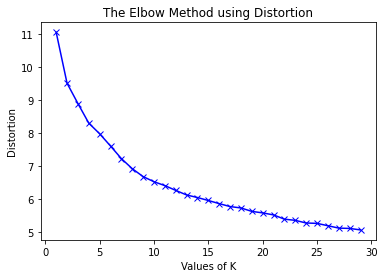

In [17]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

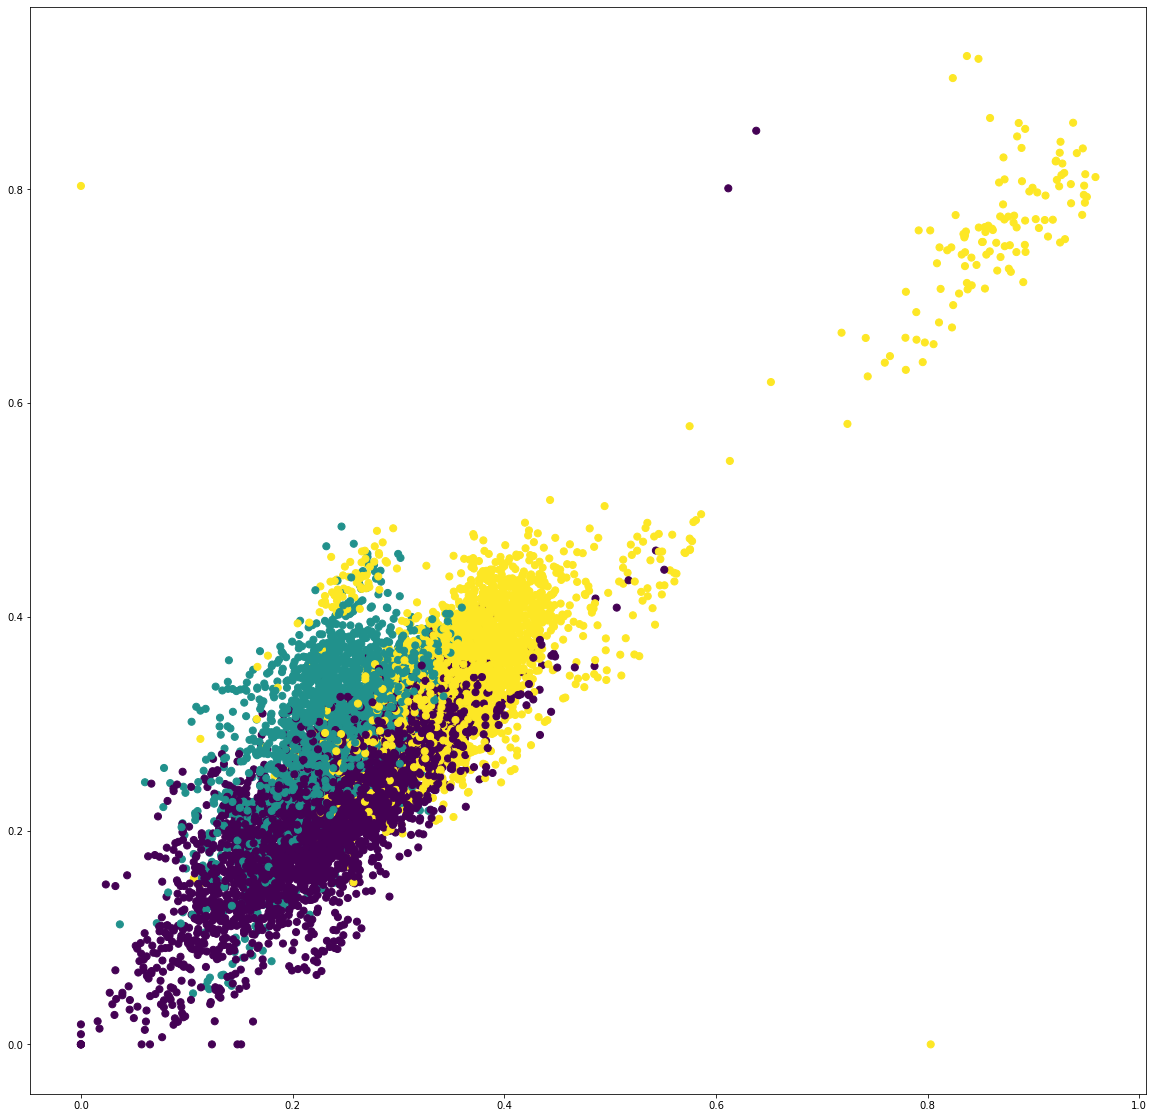

In [22]:

kmeans = KMeans(n_clusters=3, random_state=0).fit(embeddings)
y_kmeans = kmeans.predict(embeddings)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
plt.scatter(np.array(embeddings)[:, 0], np.array(embeddings)[:, 1], c=y_kmeans, s=50, cmap='viridis')

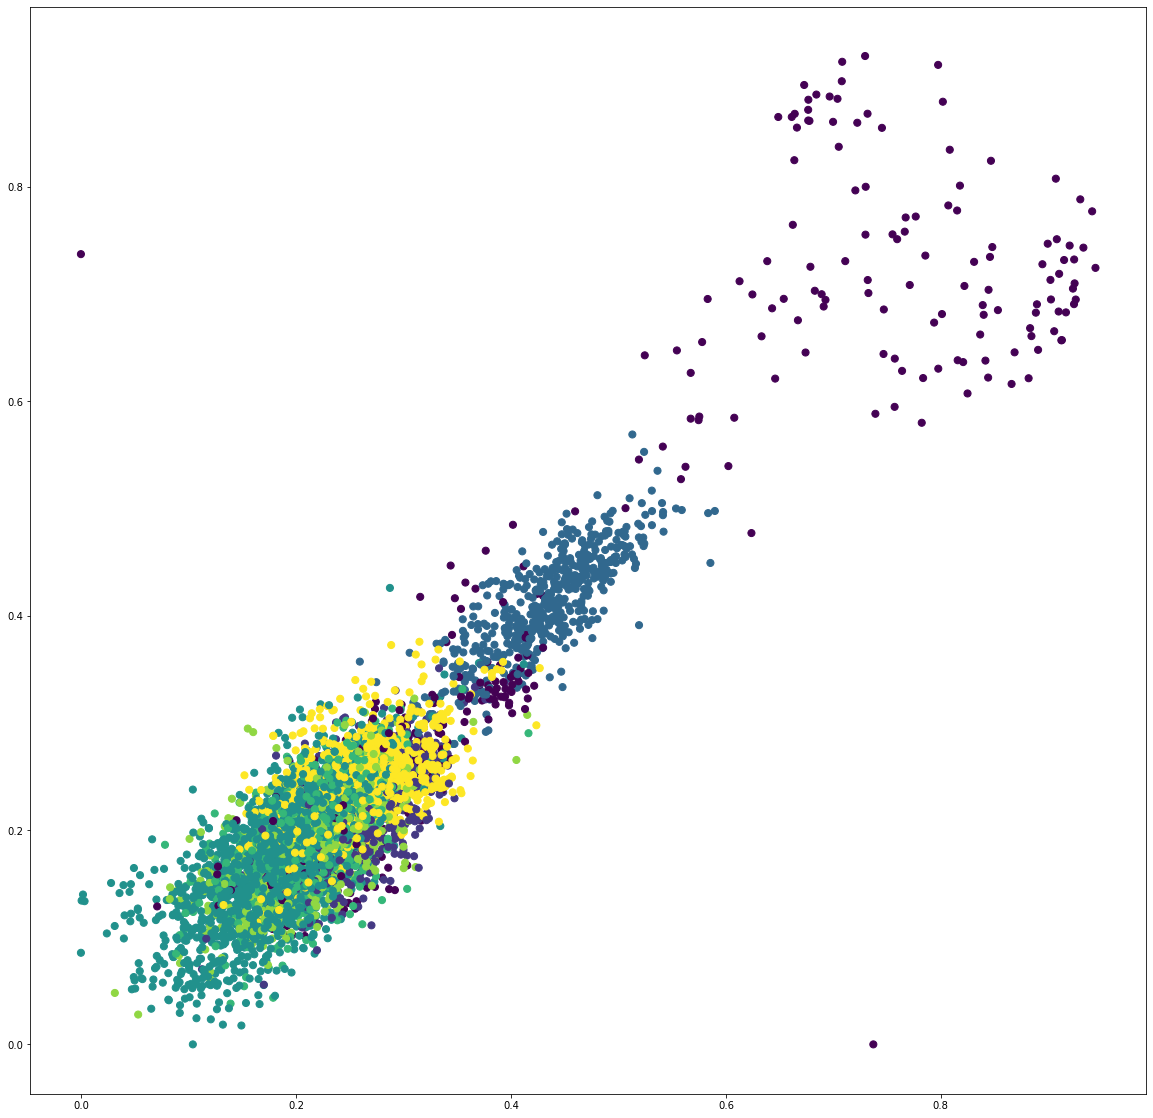

In [12]:

kmeans = KMeans(n_clusters=7, random_state=0).fit(embeddings2)
y_kmeans = kmeans.predict(embeddings2)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
plt.scatter(np.array(embeddings2)[:, 0], np.array(embeddings2)[:, 1], c=y_kmeans, s=50, cmap='viridis')

In [41]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(embeddings2)
print(cluster.labels_)


[1 1 1 ... 1 1 1]


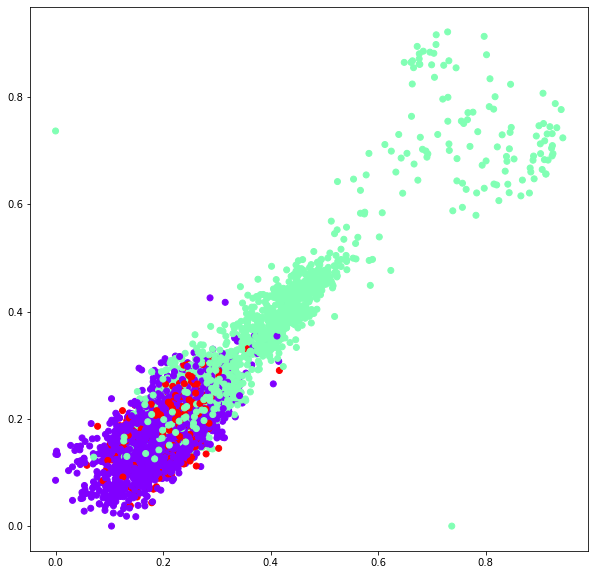

In [42]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(np.array(embeddings2)[:, 0], np.array(embeddings2)[:, 1], c=cluster.labels_, cmap='rainbow')

In [ ]:

def embxtfidf:
    
    mix_goodware = [[a*b for a,b in zip(x,y)] for x,y in zip(model.our_tfidf_matrix,embeddings)]
    mix_malware=[[a*b for a,b in zip(x,y)] for x,y in zip(model2.our_tfidf_matrix,embeddings2)]

In [13]:
def readAnt:
    with open("malware_antcolony_results.txt", 'r') as f:
            ant_mal = json.loads(f.read())
    with open("goodware_antcolony_results.txt", 'r') as f:
            ant_good = json.loads(f.read())

In [ ]:

mix_goodware_map={}
mix_malware_map={}

for i in range(len(model.tfidf_instance.vocab)):
    
    for j in range(len(model.tfidf_instance.vocab)):
        
        mix_goodware_map[(model.tfidf_instance.vocab[i],model.tfidf_instance.vocab[j])]=mix_goodware[i][j]
                
for i in range(len(model2.tfidf_instance.vocab)):
            for j in range(len(model2.tfidf_instance.vocab)):
                mix_malware_map[(model2.tfidf_instance.vocab[i],model2.tfidf_instance.vocab[j])]=mix_malware[i][j]
                


In [15]:

mix_goodware_map={}
mix_malware_map={}

for i in range(len(model.tfidf_instance.vocab)):
    
    for j in range(len(model.tfidf_instance.vocab)):
        
        mix_goodware_map[(model.tfidf_instance.vocab[i],model.tfidf_instance.vocab[j])]=ant_good[i][j]
                
for i in range(len(model2.tfidf_instance.vocab)):
            for j in range(len(model2.tfidf_instance.vocab)):
                mix_malware_map[(model2.tfidf_instance.vocab[i],model2.tfidf_instance.vocab[j])]=ant_mal[i][j]
                

In [15]:
data=pd.read_csv("brazilian-malware.csv")
corpus=data['ImportedSymbols']
data2=pd.read_csv("goodware.csv")
corpus2=data2['ImportedSymbols']
x=corpus.tolist()
y=corpus2.tolist()
def remove_common(a, b):
  
    for i in a:
        if i in b:
            
            a.remove(i)
            
  
#     print("list1 : ", a)
#     print("list2 : ", b)
  
remove_common(x,y)

print(len(x))
print(len(y))


34528
16836


In [27]:
class extractFeatures:
    
        
    def maxTfidf(self,dataset):
         
        csv_input = pd.read_csv('braz-mal18.csv')
        corpus=dataset
        predicted_good=[]
        predicted_mal=[]
        equal=[]
        for j in range (len(corpus)):
            sum_mal=0
            sum_good=0
            new_test=corpus[j].split()
            


            for i in range(len(new_test)-3):
                temp=new_test[i].lower()+" "+new_test[i+1].lower()+" "+new_test[i+2]+" "+new_test[i+3]
               
                
                


                if(temp in tfidf.vectorizer.vocabulary_.keys()):
                    sum_good+=1
                    


                if(temp in tfidf2.vectorizer.vocabulary_.keys()):
                    sum_mal+=1
                    
               
        
            predicted_good.append(sum_good)
            predicted_mal.append(sum_mal)
        csv_input['TFIDF_good'] = predicted_good
        csv_input['TFIDF_mal']=predicted_mal
        csv_input.to_csv('braz-mal18.csv')
        
        
    
        
        
        
    def maxAnt(self,dataset,dataset2):
       
        data=pd.read_csv('braz-malware.csv')
        corpus=data['ImportedSymbols']
        corpus2=dataset2
        csv_input = pd.read_csv('braz-mal18.csv')

        predicted_good=[]
        predicted_mal=[]
        equal=[]
        for j in range (len(corpus)):
            sum_mal=0
            sum_good=0
            new_test=corpus[j].split()


            for i in range(len(new_test)-1):


                if(mix_malware_map.get((new_test[i].lower(),new_test[i+1].lower()))!=None):
                    sum_mal+=1
                    


                if(mix_goodware_map.get((new_test[i].lower(),new_test[i+1].lower()))!=None):
                    sum_good+=1
            
                    
                    
            predicted_good.append(sum_good)
            predicted_mal.append(sum_mal)
                  
        for j in range (len(corpus2)):
            sum_mal=0
            sum_good=0
            new_test=corpus2[j].split()


            for i in range(len(new_test)-1):


                if(mix_malware_map.get((new_test[i].lower(),new_test[i+1].lower()))!=None):
                    sum_mal+=1
                    


                if(mix_goodware_map.get((new_test[i].lower(),new_test[i+1].lower()))!=None):
                    sum_good+=1
                  
                     
           
                
            predicted_good.append(sum_good)
            predicted_mal.append(sum_mal)
                
                
           





        csv_input['ant_good_2'] = predicted_good
        csv_input['ant_mal_2']=predicted_mal
        csv_input.to_csv('braz-mal18.csv')


    
    
            
            
    def exTfidf(self,dataset):
        csv_input = pd.read_csv('braz-mal14.csv')


        data=pd.read_csv('braz-mal14.csv')
        corpus=data['ImportedSymbols']

        predicted_good=[]
        predicted_mal=[]
        equal=[]
        for j in range (len(corpus)):
            sum_mal=0
            sum_good=0
            new_test=corpus[j].split()
            


            for i in range(len(new_test)-1):
                temp=new_test[i].lower()+" "+new_test[i+1].lower()
                
                


                if(model2.tfidf_map.get((new_test[i].lower(),new_test[i+1].lower()))!=None):
                    sum_mal+=model2.tfidf_map.get((new_test[i].lower(),new_test[i+1].lower()))
                
                
                elif temp in tfidf2.vectorizer.vocabulary_.keys():
                    c=tfidf2.vectorizer.vocabulary_[temp]
                    y=tfidf2.tfidf_vector[:,c].todense()
                    sum_mal+=y.sum()/len(y)

                
            predicted_good.append(sum_mal)
            
            

            
        csv_input['TFIDF_2'] = predicted_good
        csv_input.to_csv('braz-mal18.csv')
        
        
        
        
    def check4(self,dataset,dataset2):
        
        data=pd.read_csv('braz-malware.csv')
        corpus=data['ImportedSymbols']
        corpus2=dataset2
        csv_input = pd.read_csv('braz-mal4.csv')


        predicted_good=[]
        predicted_mal=[]
        equal=[]
        for j in range (len(corpus)):
            sum_mal=0
            sum_good=0
            new_test=corpus[j].split()
            


            for i in range(len(new_test)-1):
                temp=new_test[i].lower()+" "+new_test[i+1].lower()
                
                


                if(model2.tfidf_map.get((new_test[i].lower(),new_test[i+1].lower()))!=None):
                    sum_mal+=model2.tfidf_map.get((new_test[i].lower(),new_test[i+1].lower()))
                
    

                if(model.tfidf_map.get((new_test[i].lower(),new_test[i+1].lower()))!=None):
                    sum_good+=model.tfidf_map.get((new_test[i].lower(),new_test[i+1].lower()))
                    
                    

        
            
            predicted_good.append(sum_good)
            predicted_mal.append(sum_mal)
            
                   
        for j in range (len(corpus2)):
            sum_mal=0
            sum_good=0
            new_test=corpus2[j].split()


            for i in range(len(new_test)-1):


                if(model2.tfidf_map.get((new_test[i].lower(),new_test[i+1].lower()))!=None):
                    sum_mal+=model2.tfidf_map.get((new_test[i].lower(),new_test[i+1].lower()))
                

                   


                if(model.tfidf_map.get((new_test[i].lower(),new_test[i+1].lower()))!=None):
                    sum_good+=model.tfidf_map.get((new_test[i].lower(),new_test[i+1].lower()))
                    
                     
                    
            predicted_good.append(sum_good)
            predicted_mal.append(sum_mal)
                
        
            
            

        csv_input['TF_mal'] = predicted_mal   
        csv_input['TF_good'] = predicted_good
        csv_input.to_csv('braz-mal18.csv')
             
    def exW2v(self,dataset):

        corpus=dataset

        predicted_good=[]
        predicted_mal=[]
        equal=[]
        
        for j in range (len(corpus)):
            sum_mal=1
            sum_good=1
            new_test=corpus[j].split()
            

          
            for i in range(len(new_test)-1):
                
                
                if(new_test[i].lower() in w2v.word2vec_vector.wv.key_to_index and new_test[i+1].lower() in w2v.word2vec_vector.wv.key_to_index):
                    
                    frequency= w2v.word2vec_vector.wv.similarity(new_test[i].lower(),new_test[i+1].lower())
#                     if(frequency>0):
                        
                    sum_good+=frequency
                if(new_test[i].lower() in w2v2.word2vec_vector.wv.key_to_index and new_test[i+1].lower()  in w2v2.word2vec_vector.wv.key_to_index):
                    frequency2=w2v2.word2vec_vector.wv.similarity(new_test[i].lower(),new_test[i+1].lower())
#                     if(frequency2>0):
                        
                    sum_mal+=frequency2
               
            
            predicted_good.append(sum_good)
            predicted_mal.append(sum_mal)
                
        
            
            

        csv_input['w2v_mal'] = predicted_mal   
        csv_input['w2v_good'] = predicted_good
        csv_input.to_csv('braz-mal18.csv')
             
 
                
                
                
                
                 
   
    def exW2v2(self):
            csv_input = pd.read_csv('braz-mal12.csv')


            data=pd.read_csv('braz-malware.csv')
            corpus=data['ImportedSymbols']
            data2=pd.read_csv('goodware.csv')
            corpus2=data2['ImportedSymbols']
          

            predicted_good=[]
            predicted_mal=[]
            equal=[]
            for j in range (len(corpus)):
                sum_mal=1
                sum_good=1
                new_test=corpus[j].split()



                for i in range(len(new_test)-1):
                    if(new_test[i].lower() in w2v.word2vec_vector.wv.key_to_index and new_test[i+1].lower() in w2v.word2vec_vector.wv.key_to_index):
                    
                        frequency= w2v.word2vec_vector.wv.similarity(new_test[i].lower(),new_test[i+1].lower())
                        if(frequency>0):
                        
                            sum_good*=frequency
                    if(new_test[i].lower() in w2v2.word2vec_vector.wv.key_to_index and new_test[i+1].lower()  in w2v2.word2vec_vector.wv.key_to_index):
                        frequency2=w2v2.word2vec_vector.wv.similarity(new_test[i].lower(),new_test[i+1].lower())
                        if(frequency2>0):
                        
                            sum_mal*=frequency2
                            
                            
                
               

                predicted_good.append(sum_good)
                predicted_mal.append(sum_mal)
                
            for j in range (len(corpus2)):
                sum_mal=1
                sum_good=1
                new_test=corpus2[j].split()



                for i in range(len(new_test)-1):
                    if(new_test[i].lower() in w2v.word2vec_vector.wv.key_to_index and new_test[i+1].lower() in w2v.word2vec_vector.wv.key_to_index):
                    
                        frequency= w2v.word2vec_vector.wv.similarity(new_test[i].lower(),new_test[i+1].lower())
                        if(frequency>0):
                        
                            sum_good*=frequency
                    if(new_test[i].lower() in w2v2.word2vec_vector.wv.key_to_index and new_test[i+1].lower()  in w2v2.word2vec_vector.wv.key_to_index):
                        frequency2=w2v2.word2vec_vector.wv.similarity(new_test[i].lower(),new_test[i+1].lower())
                        if(frequency2>0):
                        
                            sum_mal*=frequency2
               

                predicted_good.append(sum_good)
                predicted_mal.append(sum_mal)






            csv_input['w2v_good_2'] = predicted_good
            csv_input['w2v_mal_2']=predicted_mal
            csv_input.to_csv('braz-mal18.csv')
            
            
    def exGE(self):
            csv_input = pd.read_csv('braz-mal.csv')


            data=pd.read_csv('braz-malware.csv')
            corpus=data['ImportedSymbols']
            data2=pd.read_csv('goodware.csv')
            corpus2=data2['ImportedSymbols']

            predicted_good=[]
            predicted_mal=[]
            equal=[]
            for j in range (len(corpus)):
                sum_mal=0
                sum_good=0
                new_test=corpus[j].split()



                for i in range(len(new_test)-1):
                    if(new_test[i].lower() in model_n2v.w2v_model.wv.key_to_index and new_test[i+1].lower() in model_n2v.w2v_model.wv.key_to_index):
                    
                        frequency= model_n2v.w2v_model.wv.similarity(new_test[i].lower(),new_test[i+1].lower())
                        sum_good+=frequency
                    if(new_test[i].lower() in model2_n2v.w2v_model.wv.key_to_index and new_test[i+1].lower()  in model2_n2v.w2v_model.wv.key_to_index):
                        frequency2=model2_n2v.w2v_model.wv.similarity(new_test[i].lower(),new_test[i+1].lower())
                        sum_mal+=frequency2

                predicted_good.append(sum_good)
                predicted_mal.append(sum_mal)
                
            for j in range (len(corpus2)):
                sum_mal=0
                sum_good=0
                new_test=corpus2[j].split()



                for i in range(len(new_test)-1):
                    if(new_test[i].lower() in model_n2v.w2v_model.wv.key_to_index and new_test[i+1].lower() in model_n2v.w2v_model.wv.key_to_index):
                    
                        frequency= model_n2v.w2v_model.wv.similarity(new_test[i].lower(),new_test[i+1].lower())
                        sum_good+=frequency
                    if(new_test[i].lower() in model2_n2v.w2v_model.wv.key_to_index and new_test[i+1].lower()  in model2_n2v.w2v_model.wv.key_to_index):
                        frequency2=model2_n2v.w2v_model.wv.similarity(new_test[i].lower(),new_test[i+1].lower())
                        sum_mal+=frequency2

                predicted_good.append(sum_good)
                predicted_mal.append(sum_mal)






            csv_input['ge_good'] = predicted_good
            csv_input['ge_mal']=predicted_mal
            csv_input.to_csv('braz-mal18.csv')
            
            
            
    def FourGramTF(self,dataset,dataset2):
       
            data=pd.read_csv('braz-malware.csv')
            corpus=data['ImportedSymbols']
            corpus2=dataset2
            csv_input = pd.read_csv('braz-mal14.csv')

            predicted_good=[]
            predicted_mal=[]
            equal=[]
            for j in range (len(corpus)):
                sum_mal=0
                sum_good=0
                new_test=corpus[j].split()


                for i in range(len(new_test)-3):
                    temp=new_test[i].lower()+" "+new_test[i+1].lower()+" "+new_test[i+2]+" "+new_test[i+3]


                    if(temp in tfidf.vectorizer.vocabulary_.keys()):
                        sum_good+=1
                    


                    if(temp in tfidf2.vectorizer.vocabulary_.keys()):
                        sum_mal+=1


                predicted_good.append(sum_good)
                predicted_mal.append(sum_mal)

            for j in range (len(corpus2)):
                sum_mal=0
                sum_good=0
                new_test=corpus2[j].split()


                for i in range(len(new_test)-3):


                    temp=new_test[i].lower()+" "+new_test[i+1].lower()+" "+new_test[i+2]+" "+new_test[i+3]
                    if(temp in tfidf.vectorizer.vocabulary_.keys()):
                        sum_good+=1
                    if(temp in tfidf2.vectorizer.vocabulary_.keys()):
                        sum_mal+=1
                
                predicted_good.append(sum_good)
                predicted_mal.append(sum_mal)

            csv_input['4_ngram_good'] = predicted_good
            csv_input['4_ngram_mal']=predicted_mal
            csv_input.to_csv('braz-mal18.csv')
    def onegram(self,dataset,dataset2):
       
            data=pd.read_csv('braz-malware.csv')
            corpus=data['ImportedSymbols']
            corpus2=dataset2
            csv_input = pd.read_csv('braz-mal14.csv')

            predicted_good=[]
            predicted_mal=[]
            equal=[]
            for j in range (len(corpus)):
                sum_mal=0
                sum_good=0
                new_test=corpus[j].split()


                for i in range(len(new_test)):
                    temp=new_test[i].lower()


                    if(temp in tfidf.vectorizer.vocabulary_.keys()):
                        sum_good+=1
                    


                    if(temp in tfidf2.vectorizer.vocabulary_.keys()):
                        sum_mal+=1
                        
                if(sum_mal>sum_good):
                    sum_mal=10
                    sum_good=0
                elif(sum_good>sum_mal):
                    sum_good=10
                    sum_mal=0


                predicted_good.append(sum_good)
                predicted_mal.append(sum_mal)

            for j in range (len(corpus2)):
                sum_mal=0
                sum_good=0
                new_test=corpus2[j].split()


                for i in range(len(new_test)):


                    temp=new_test[i].lower()
                    if(temp in tfidf.vectorizer.vocabulary_.keys()):
                        sum_good+=1
                    if(temp in tfidf2.vectorizer.vocabulary_.keys()):
                        sum_mal+=1
                if(sum_mal>sum_good):
                    sum_mal=10
                    sum_good=0
                elif(sum_good>sum_mal):
                    sum_good=10
                    sum_mal=0
                
                predicted_good.append(sum_good)
                predicted_mal.append(sum_mal)

            csv_input['1gram_good'] = predicted_good
            csv_input['1gram_mal']=predicted_mal
            csv_input.to_csv('braz-mal18.csv')





      
   
        
    



      
   
        
    

   
        
        


   
   

In [39]:
cls=extractFeatures()

In [41]:
cls.onegram(x,y)

In [42]:
cls.maxTfidf(x)

In [43]:
cls.maxAnt(x,y)

In [44]:
cls.exTfidf(x)
cls.exTfidf(y)

In [45]:
cls.check4(x,y)

In [46]:
cls.exW2v(x)
cls.exW2v(y)

In [47]:
cls.exW2v2()

In [48]:
cls.exGE()

In [ ]:
cls.FourGramTF(x,y)

In [14]:

file= pefile.PE("npp.8.2.1.Installer.x64.exe")
api_calls=[]
for item in file.DIRECTORY_ENTRY_IMPORT:

    
    for i in item.imports:

        if(i.name is not None):
        
            api_calls.append(i.name.decode("utf-8"))
            
print(api_calls)

['ExitProcess', 'SetFileAttributesW', 'Sleep', 'GetTickCount', 'CreateFileW', 'GetFileSize', 'GetModuleFileNameW', 'GetCurrentProcess', 'SetCurrentDirectoryW', 'GetFileAttributesW', 'SetEnvironmentVariableW', 'GetWindowsDirectoryW', 'GetTempPathW', 'GetCommandLineW', 'GetVersion', 'SetErrorMode', 'lstrlenW', 'lstrcpynW', 'CopyFileW', 'GetShortPathNameW', 'GlobalLock', 'CreateThread', 'GetLastError', 'CreateDirectoryW', 'CreateProcessW', 'RemoveDirectoryW', 'lstrcmpiA', 'GetTempFileNameW', 'WriteFile', 'lstrcpyA', 'MoveFileExW', 'lstrcatW', 'GetSystemDirectoryW', 'GetProcAddress', 'GetModuleHandleA', 'GetExitCodeProcess', 'WaitForSingleObject', 'lstrcmpiW', 'MoveFileW', 'GetFullPathNameW', 'SetFileTime', 'SearchPathW', 'CompareFileTime', 'lstrcmpW', 'CloseHandle', 'ExpandEnvironmentStringsW', 'GlobalFree', 'GlobalUnlock', 'GetDiskFreeSpaceW', 'GlobalAlloc', 'FindFirstFileW', 'FindNextFileW', 'DeleteFileW', 'SetFilePointer', 'ReadFile', 'FindClose', 'lstrlenA', 'MulDiv', 'MultiByteToWide